#### Problem Statement 

We are uncover products and geolocation that performs very well based on the profit generated.

#### Import Packages and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv(r'C:\Users\user\Downloads\Practice dataset.csv')

In [4]:
df

,Unnamed: 0,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods
0,0,1,2020-10-17,Shirt,Los Anges,1290,16,0.070051,0.060433,516.00
1,1,2,2022-02-09,Bag,Montreal,4453,12,0.396331,0.087020,1781.20
2,2,3,2021-05-28,Compter,Los Anges,3933,87,0.354361,0.002370,2949.75
3,3,4,2020-12-18,Shirt,Seattle,6160,19,0.060434,0.068478,2464.00
4,4,5,2022-09-16,Dress,Seattle,7513,89,0.090327,0.013464,3756.50
...,...,...,...,...,...,...,...,...,...,...
995,995,996,2022-06-12,Hat,Los Anges,9857,4,0.009385,0.050736,2464.25
996,996,997,2022-08-20,Pants,New York,9121,6,0.190660,0.011654,3192.35
997,997,998,2021-03-09,Shoes,Los Anges,9321,99,0.299502,0.080569,5592.60
998,998,999,2021-06-13,Compter,Seattle,6379,98,0.180285,0.088348,4784.25


#### Data Assessment

In [5]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns')

We have 1000 rows and 10 columns


In [6]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'date', 'product', 'geolocation',
       'revenue', 'sales', 'discount', 'tax', 'cost_of_goods'],
      dtype='object')

In [7]:
df.head(10)

,Unnamed: 0,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods
0,0,1,2020-10-17,Shirt,Los Anges,1290,16,0.070051,0.060433,516.00
1,1,2,2022-02-09,Bag,Montreal,4453,12,0.396331,0.087020,1781.20
2,2,3,2021-05-28,Compter,Los Anges,3933,87,0.354361,0.002370,2949.75
3,3,4,2020-12-18,Shirt,Seattle,6160,19,0.060434,0.068478,2464.00
4,4,5,2022-09-16,Dress,Seattle,7513,89,0.090327,0.013464,3756.50
5,5,6,2021-09-11,Bag,Vancouver,4577,63,0.401127,0.016438,1830.80
6,6,7,2022-01-15,Shirt,Dallas,1540,30,0.392296,0.071829,616.00
7,7,8,2022-02-18,Compter,Chicago,7506,81,0.222570,0.012009,5629.50
8,8,9,2022-07-14,Pants,Miami,3681,67,0.312795,0.069979,1288.35
9,9,10,2021-10-09,Laptop,New York,5014,34,0.396076,0.034665,3509.80


In [8]:
df.tail(10)

,Unnamed: 0,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods
990,990,991,2021-08-01,T-shirt,New York,2707,35,0.297475,0.022902,812.10
991,991,992,2020-02-04,T-shirt,Toronto,7706,16,0.487203,0.050435,2311.80
992,992,993,2022-03-19,T-shirt,Miami,2054,10,0.066101,0.006669,616.20
993,993,994,2021-07-08,Hat,Montreal,5412,88,0.034874,0.001659,1353.00
994,994,995,2020-11-16,Shirt,Miami,2076,72,0.202135,0.047274,830.40
995,995,996,2022-06-12,Hat,Los Anges,9857,4,0.009385,0.050736,2464.25
996,996,997,2022-08-20,Pants,New York,9121,6,0.190660,0.011654,3192.35
997,997,998,2021-03-09,Shoes,Los Anges,9321,99,0.299502,0.080569,5592.60
998,998,999,2021-06-13,Compter,Seattle,6379,98,0.180285,0.088348,4784.25
999,999,1000,2022-01-01,Compter,Dallas,9386,21,0.068297,0.061598,7039.50


In [9]:
df.sample(10)

,Unnamed: 0,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods
910,910,911,2022-01-14,Shoes,Dallas,571,44,0.048241,0.036164,342.60
760,760,761,2020-01-21,Hat,Toronto,768,17,0.455313,0.054299,192.00
510,510,511,2020-09-01,T-shirt,Dallas,7486,55,0.053476,0.076035,2245.80
53,53,54,2022-11-22,Compter,Seattle,3647,38,0.337361,0.049844,2735.25
166,166,167,2020-11-24,Shirt,Vancouver,9592,56,0.024509,0.051154,3836.80
405,405,406,2020-12-05,Phone,San Franchiso,562,77,0.086081,0.036764,449.60
843,843,844,2021-11-01,T-shirt,Vancouver,389,65,0.368602,0.064702,116.70
3,3,4,2020-12-18,Shirt,Seattle,6160,19,0.060434,0.068478,2464.00
702,702,703,2021-03-17,Dress,Los Anges,4980,58,0.296660,0.035200,2490.00
466,466,467,2021-08-13,Shoes,San Franchiso,9045,36,0.245468,0.026562,5427.00


In [10]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
df

,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods
0,1,2020-10-17,Shirt,Los Anges,1290,16,0.070051,0.060433,516.00
1,2,2022-02-09,Bag,Montreal,4453,12,0.396331,0.087020,1781.20
2,3,2021-05-28,Compter,Los Anges,3933,87,0.354361,0.002370,2949.75
3,4,2020-12-18,Shirt,Seattle,6160,19,0.060434,0.068478,2464.00
4,5,2022-09-16,Dress,Seattle,7513,89,0.090327,0.013464,3756.50
...,...,...,...,...,...,...,...,...,...
995,996,2022-06-12,Hat,Los Anges,9857,4,0.009385,0.050736,2464.25
996,997,2022-08-20,Pants,New York,9121,6,0.190660,0.011654,3192.35
997,998,2021-03-09,Shoes,Los Anges,9321,99,0.299502,0.080569,5592.60
998,999,2021-06-13,Compter,Seattle,6379,98,0.180285,0.088348,4784.25


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    1000 non-null   int64  
 1   date           1000 non-null   object 
 2   product        980 non-null    object 
 3   geolocation    994 non-null    object 
 4   revenue        1000 non-null   int64  
 5   sales          950 non-null    object 
 6   discount       1000 non-null   float64
 7   tax            1000 non-null   float64
 8   cost_of_goods  1000 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 70.4+ KB


In [13]:
df.isnull().sum()

customer_id       0
date              0
product          20
geolocation       6
revenue           0
sales            50
discount          0
tax               0
cost_of_goods     0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.dtypes
# date column have incorrect datatype
# Sales column have incorrect dtype

customer_id        int64
date              object
product           object
geolocation       object
revenue            int64
sales             object
discount         float64
tax              float64
cost_of_goods    float64
dtype: object

In [18]:
df['product'].value_counts().index
# replace compter with Computer 

Index(['Pants', 'Shirt', 'Phone', 'T-shirt', 'Compter', 'Dress', 'Laptop',
       'Shoes', 'Bag', 'Hat'],
      dtype='object', name='product')

In [19]:
df['geolocation'].value_counts().index
# replace Los Anges with Los Angeles
# replace San Franchiso with San Francisco 

Index(['Dallas', 'New York', 'Vancouver', 'Chicago', 'Montreal', 'Los Anges',
       'Seattle', 'San Franchiso', 'Toronto', 'Miami'],
      dtype='object', name='geolocation')

#### Data Cleaning 


In [20]:
#df['product'].value_counts()
df['product'].fillna('unknown', inplace = True)

In [21]:
df['product'].value_counts()

product
Pants      124
Shirt      108
Phone      101
T-shirt    100
Compter     94
Dress       93
Laptop      93
Shoes       93
Bag         88
Hat         86
unknown     20
Name: count, dtype: int64

In [22]:
df['product'].mode()

0    Pants
Name: product, dtype: object

In [23]:
df

,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods
0,1,2020-10-17,Shirt,Los Anges,1290,16,0.070051,0.060433,516.00
1,2,2022-02-09,Bag,Montreal,4453,12,0.396331,0.087020,1781.20
2,3,2021-05-28,Compter,Los Anges,3933,87,0.354361,0.002370,2949.75
3,4,2020-12-18,Shirt,Seattle,6160,19,0.060434,0.068478,2464.00
4,5,2022-09-16,Dress,Seattle,7513,89,0.090327,0.013464,3756.50
...,...,...,...,...,...,...,...,...,...
995,996,2022-06-12,Hat,Los Anges,9857,4,0.009385,0.050736,2464.25
996,997,2022-08-20,Pants,New York,9121,6,0.190660,0.011654,3192.35
997,998,2021-03-09,Shoes,Los Anges,9321,99,0.299502,0.080569,5592.60
998,999,2021-06-13,Compter,Seattle,6379,98,0.180285,0.088348,4784.25


In [24]:
df['geolocation'].fillna('Unknown', inplace = True)

In [25]:
df['geolocation'].value_counts()

geolocation
Dallas           107
New York         103
Vancouver        102
Chicago          102
Montreal         100
Los Anges         98
Seattle           98
San Franchiso     98
Toronto           95
Miami             91
Unknown            6
Name: count, dtype: int64

In [26]:
df['sales'].dtype

dtype('O')

In [27]:
df

,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods
0,1,2020-10-17,Shirt,Los Anges,1290,16,0.070051,0.060433,516.00
1,2,2022-02-09,Bag,Montreal,4453,12,0.396331,0.087020,1781.20
2,3,2021-05-28,Compter,Los Anges,3933,87,0.354361,0.002370,2949.75
3,4,2020-12-18,Shirt,Seattle,6160,19,0.060434,0.068478,2464.00
4,5,2022-09-16,Dress,Seattle,7513,89,0.090327,0.013464,3756.50
...,...,...,...,...,...,...,...,...,...
995,996,2022-06-12,Hat,Los Anges,9857,4,0.009385,0.050736,2464.25
996,997,2022-08-20,Pants,New York,9121,6,0.190660,0.011654,3192.35
997,998,2021-03-09,Shoes,Los Anges,9321,99,0.299502,0.080569,5592.60
998,999,2021-06-13,Compter,Seattle,6379,98,0.180285,0.088348,4784.25


In [28]:
df['sales'].str.contains('\D').sum()

4

In [30]:
df['sales'] = pd.to_numeric(df['sales'], errors = 'coerce')

In [31]:
df['sales'].isnull().sum()

54

In [32]:
df['sales'].dtype

dtype('float64')

<Axes: >

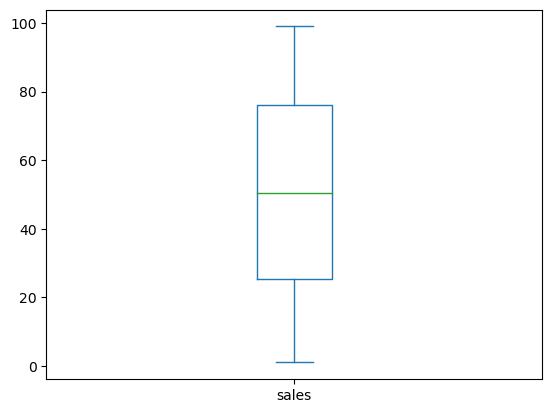

In [33]:
df['sales'].plot(kind = 'box')

In [34]:
round(df['sales'].mean(), 1)

50.2

In [35]:
df['sales'].median()

50.5

In [36]:
df['sales'].fillna(df['sales'].median(), inplace = True)

In [37]:
df['sales'] = df['sales'].astype('int64')

In [38]:
df.isnull().sum()

customer_id      0
date             0
product          0
geolocation      0
revenue          0
sales            0
discount         0
tax              0
cost_of_goods    0
dtype: int64

In [39]:
df.dtypes

customer_id        int64
date              object
product           object
geolocation       object
revenue            int64
sales              int64
discount         float64
tax              float64
cost_of_goods    float64
dtype: object

In [40]:
df['date'] = df['date'].astype('datetime64[ns]')

In [41]:
df['product'].replace('Compter', 'Computer', inplace = True)

In [42]:
df['product'].replace({'Compter': 'Computer'}, inplace = True)

In [43]:
df['product'].value_counts()

product
Pants       124
Shirt       108
Phone       101
T-shirt     100
Computer     94
Dress        93
Laptop       93
Shoes        93
Bag          88
Hat          86
unknown      20
Name: count, dtype: int64

In [44]:
df['geolocation'].replace({'San Franchiso': 'San Francisco', 'Los Anges': 'Los Angeles'}, inplace = True)

In [45]:
df['geolocation'].value_counts()

geolocation
Dallas           107
New York         103
Vancouver        102
Chicago          102
Montreal         100
Los Angeles       98
Seattle           98
San Francisco     98
Toronto           95
Miami             91
Unknown            6
Name: count, dtype: int64

### Feature Engineering 

In [46]:
df

,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods
0,1,2020-10-17,Shirt,Los Angeles,1290,16,0.070051,0.060433,516.00
1,2,2022-02-09,Bag,Montreal,4453,12,0.396331,0.087020,1781.20
2,3,2021-05-28,Computer,Los Angeles,3933,87,0.354361,0.002370,2949.75
3,4,2020-12-18,Shirt,Seattle,6160,19,0.060434,0.068478,2464.00
4,5,2022-09-16,Dress,Seattle,7513,89,0.090327,0.013464,3756.50
...,...,...,...,...,...,...,...,...,...
995,996,2022-06-12,Hat,Los Angeles,9857,4,0.009385,0.050736,2464.25
996,997,2022-08-20,Pants,New York,9121,6,0.190660,0.011654,3192.35
997,998,2021-03-09,Shoes,Los Angeles,9321,99,0.299502,0.080569,5592.60
998,999,2021-06-13,Computer,Seattle,6379,98,0.180285,0.088348,4784.25


In [47]:
df['profit'] = df['revenue'] - (df['revenue']*df['discount']) - (df['revenue']*df['tax'])- df['cost_of_goods']

In [48]:
df

,customer_id,date,product,geolocation,revenue,sales,discount,tax,cost_of_goods,profit
0,1,2020-10-17,Shirt,Los Angeles,1290,16,0.070051,0.060433,516.00,605.675238
1,2,2022-02-09,Bag,Montreal,4453,12,0.396331,0.087020,1781.20,519.440089
2,3,2021-05-28,Computer,Los Angeles,3933,87,0.354361,0.002370,2949.75,-419.773542
3,4,2020-12-18,Shirt,Seattle,6160,19,0.060434,0.068478,2464.00,2901.904535
4,5,2022-09-16,Dress,Seattle,7513,89,0.090327,0.013464,3756.50,2976.717163
...,...,...,...,...,...,...,...,...,...,...
995,996,2022-06-12,Hat,Los Angeles,9857,4,0.009385,0.050736,2464.25,6800.140677
996,997,2022-08-20,Pants,New York,9121,6,0.190660,0.011654,3192.35,4083.349450
997,998,2021-03-09,Shoes,Los Angeles,9321,99,0.299502,0.080569,5592.60,185.762226
998,999,2021-06-13,Computer,Seattle,6379,98,0.180285,0.088348,4784.25,-118.863271


In [49]:
import matplotlib.pyplot as plt 

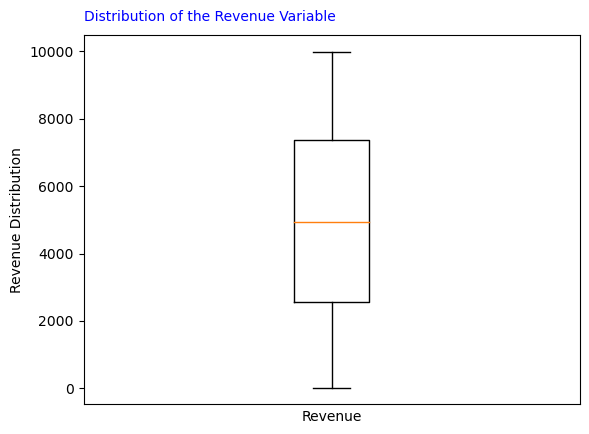

In [51]:
plt.boxplot(df['revenue'])
plt.xticks([])
plt.xlabel('Revenue')
plt.ylabel('Revenue Distribution')
plt.title('Distribution of the Revenue Variable', loc = 'left', pad = 10, fontdict = {'fontsize':10, 'color':'b'})
plt.show()

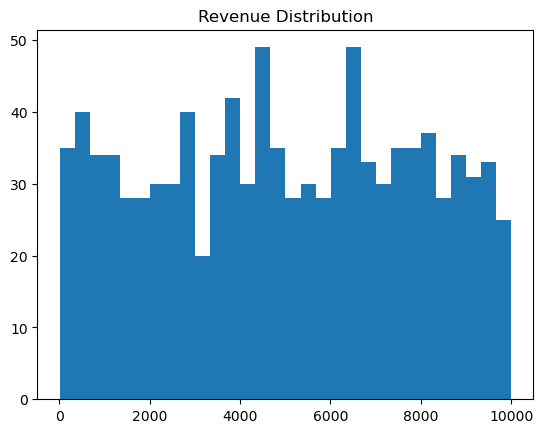

In [53]:
plt.hist(df['revenue'], bins = 30)
plt.title('Revenue Distribution')
plt.show()

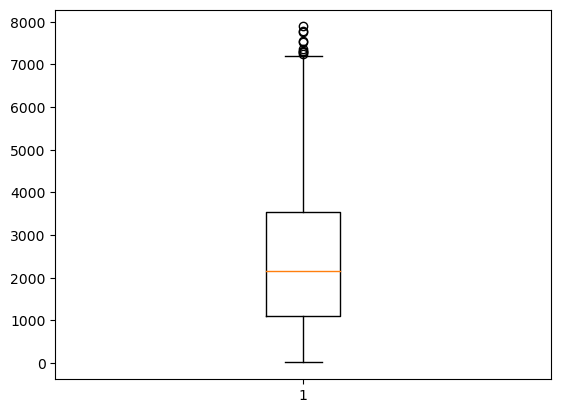

In [54]:
plt.boxplot(df['cost_of_goods'])
plt.show()

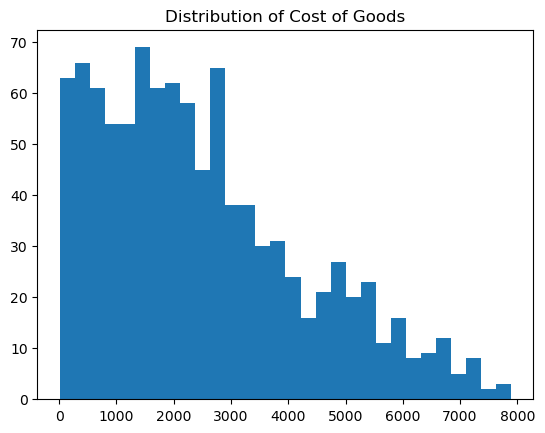

In [55]:
plt.hist(df['cost_of_goods'], bins = 30)
plt.title('Distribution of Cost of Goods')
plt.show()

In [56]:
profit_by_product = df.groupby('product')['profit'].sum()[:10].sort_values(ascending = False)
profit_by_product

product
Pants       224605.749209
T-shirt     221723.304218
Hat         184893.330325
Shirt       139251.583715
Bag         124891.475896
Dress        84184.819766
Shoes        55979.088958
Laptop       10725.450755
Computer     -5744.629107
Phone       -46738.428219
Name: profit, dtype: float64

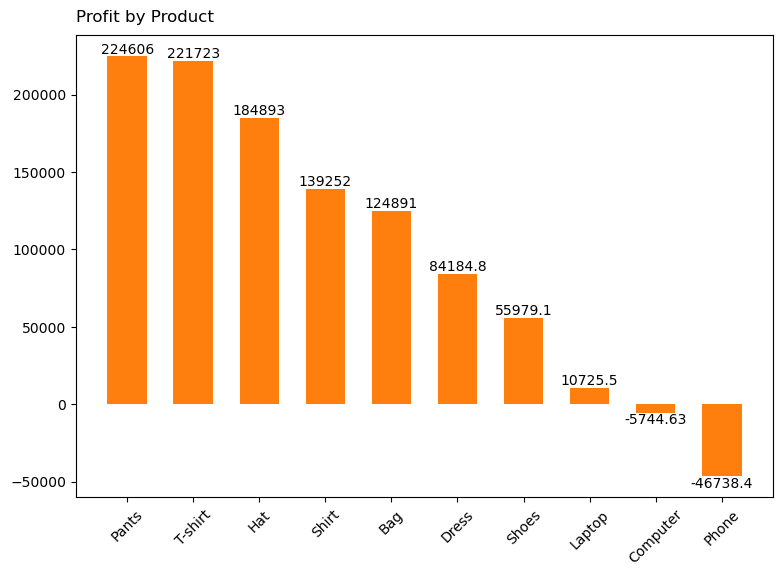

In [61]:
plt.figure(figsize = (9, 6))
plt.bar(profit_by_product.index, profit_by_product.values, width = 0.6)
plt.xticks(rotation = 45)
plt.title('Profit by Product', loc = 'left', pad = 10)
plt.bar_label(plt.bar(profit_by_product.index, profit_by_product.values, width = 0.6))
plt.show()

In [62]:
profit_by_location

geolocation
San Francisco     76833.557207
Dallas            84089.231651
Montreal          86297.190805
Miami             89281.689694
Seattle           92042.264646
Chicago           96478.007158
New York         104007.699087
Vancouver        107554.461169
Toronto          123031.043210
Los Angeles      140798.554292
Name: profit, dtype: float64

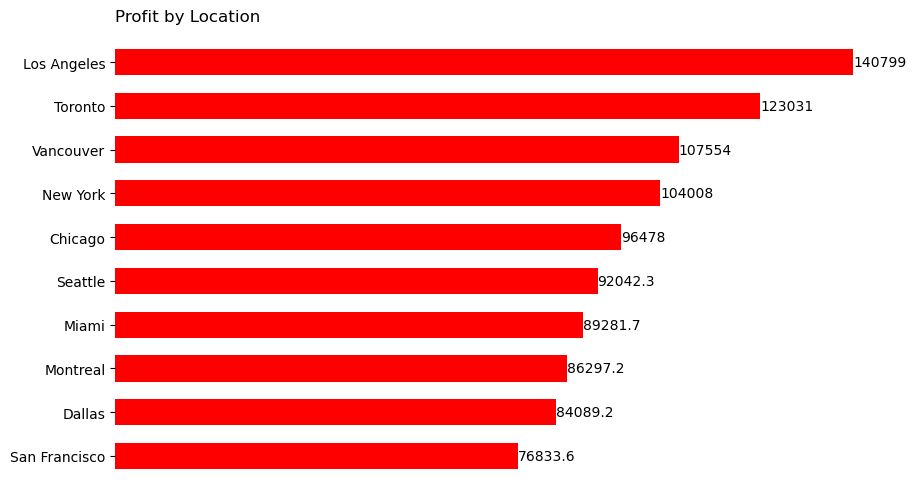

In [63]:
profit_by_location = df.groupby('geolocation')['profit'].sum().sort_values(ascending = True)[1:12]
plt.figure(figsize = [10,6])
plt.bar_label(plt.barh(profit_by_location.index, profit_by_location.values, height = 0.6, color = 'red'))
plt.xticks([])
plt.title('Profit by Location', loc = 'left', pad = 5)
spines = ['left', 'right', 'bottom', 'top']
for spine in spines:
    plt.gca().spines[spine].set_visible(False)
plt.show()

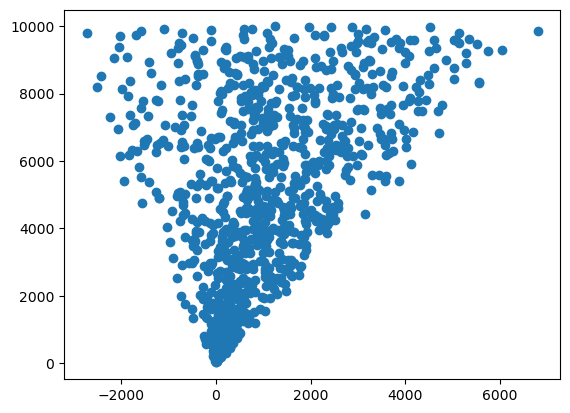

In [65]:
plt.scatter(df['profit'], df['revenue'])

In [67]:
df['revenue'].corr(df['profit'])

0.3955450109388978

In [68]:
df['year'] = df['date'].dt.year

In [69]:
sales_by_year = df.groupby('year')['sales'].sum()

In [70]:
sales_by_year

year
2020    16457
2021    16434
2022    17338
Name: sales, dtype: int64

In [72]:
np.arange(2020, 2023)

array([2020, 2021, 2022])

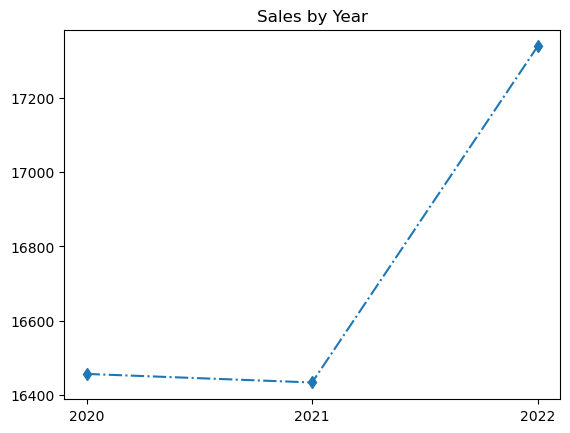

In [73]:
plt.plot(sales_by_year.index, sales_by_year.values, marker = 'd', linestyle = 'dashdot')
plt.xticks(np.arange(2020, 2023))
plt.title('Sales by Year')
plt.show()